In [22]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch as th
import matplotlib.pyplot as plt
from aimanager.utils.utils import make_dir
from aimanager.utils.merge import merge_files_by_name

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


run = 'v1_4'

base_folder = f'../../data/manager/simulate_rule/{run}'

folder = os.path.join(base_folder, 'train')
merged_folder = os.path.join(base_folder, 'merged')

plot_folder = f'plots/{run}'

make_dir(plot_folder)
make_dir(merged_folder)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$pun = (20-cont) \cdot s + cont? \cdot  c - b$

In [26]:
file_names = ['trace.csv']


def get_df(file_name, merged_folder, folder):
    m_file = os.path.join(merged_folder, file_name)
    if not os.path.isfile(m_file):
        df = merge_files_by_name(folder, file_name)
        df.to_parquet(m_file)
        return df
    else:
        return pd.read_parquet(m_file)

sim_df = get_df('trace.csv', merged_folder, folder)


id_vars = ['s', 'round_number', 'agent']

In [27]:
sim_df = sim_df.sort_values(id_vars)

df_melt = pd.melt(sim_df, id_vars=id_vars, value_vars=['punishments', 'common_good', 'contributions', 'payoffs'], var_name='metric', value_name='value')

In [31]:
df_melt

,s,round_number,metric,value
0,0.0,0,punishments,0.000000
1,0.0,0,punishments,0.000000
2,0.0,0,punishments,0.000000
3,0.0,0,punishments,0.000000
4,0.0,1,punishments,0.000000
...,...,...,...,...
2811,5.0,14,payoffs,24.012001
2812,5.0,15,payoffs,25.892000
2813,5.0,15,payoffs,26.446001
2814,5.0,15,payoffs,25.072000


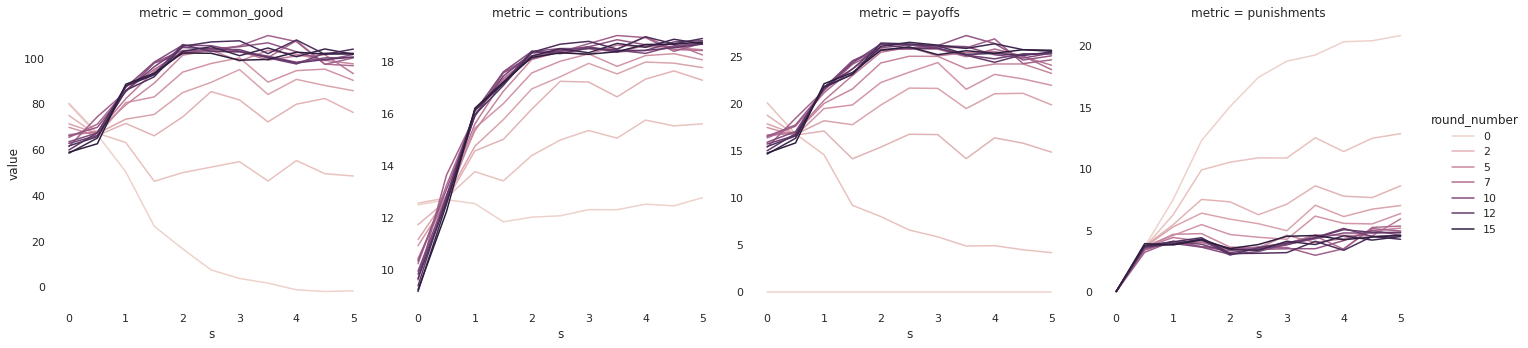

In [34]:
df = df_melt.groupby(['s', 'metric', 'round_number'])['value'].mean().reset_index()

sns.relplot(data=df, x='s', y='value', col='metric', hue='round_number', kind='line', facet_kws={'sharey': False, 'sharex': True}, ci=None)

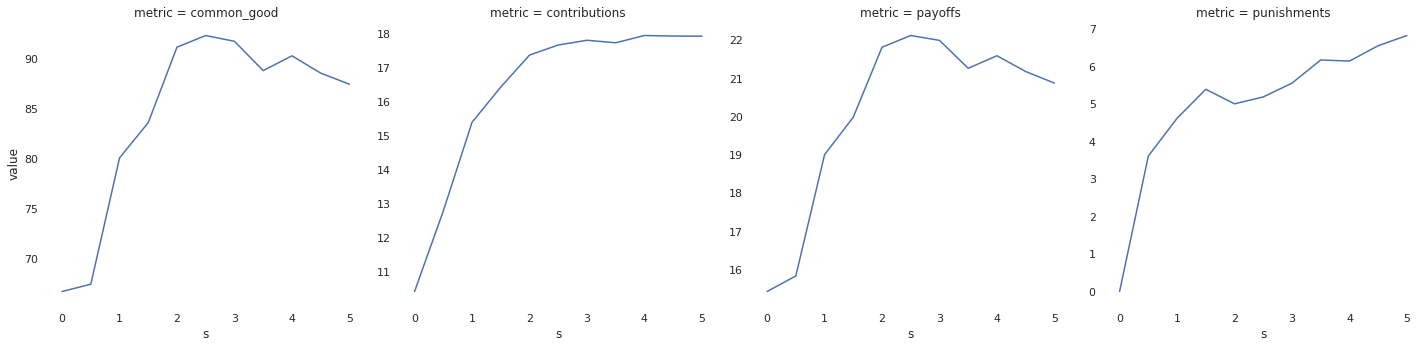

In [35]:
df = df_melt.groupby(['s', 'metric'])['value'].mean().reset_index()

sns.relplot(data=df, x='s', y='value', col='metric', kind='line', facet_kws={'sharey': False, 'sharex': True}, ci=None)